#Gabriel Trentino Fróes:

O que eu descobri aqui:

## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.0
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes_path = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'
filmes = pd.read_csv(filmes_path)

filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.index = filmes.filmeId
filmes.drop("filmeId", axis=1, inplace=True)

In [3]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [5]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas_path = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'
notas = pd.read_csv(notas_path)

notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [7]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [0]:
# solução
filmes['nota_media'] = notas.nota.groupby(notas.filmeId).mean()

In [9]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [10]:
# solução para calcular o total de votos por filme
notas.filmeId.value_counts()


356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: filmeId, Length: 9724, dtype: int64

In [0]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas.filmeId.value_counts()
filmes = filmes[filmes['total_de_votos'] > 49]

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

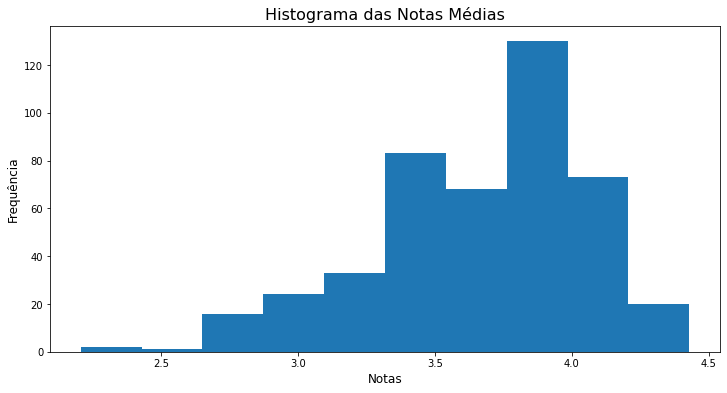

In [13]:
# solução histograma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))

filmes.nota_media.plot(kind='hist')
plt.title('Histograma das Notas Médias', fontsize = 16)
plt.xlabel('Notas', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12);

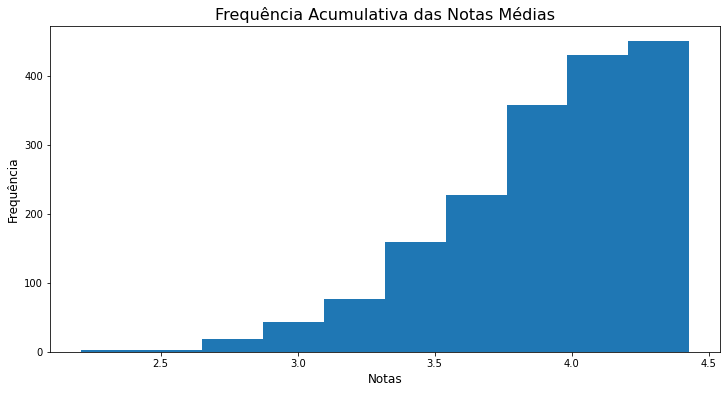

In [14]:
# solução cumulativa
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,6))

filmes.nota_media.plot(kind='hist', cumulative=True)
plt.title('Frequência Acumulativa das Notas Médias', fontsize = 16)
plt.xlabel('Notas', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12);

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

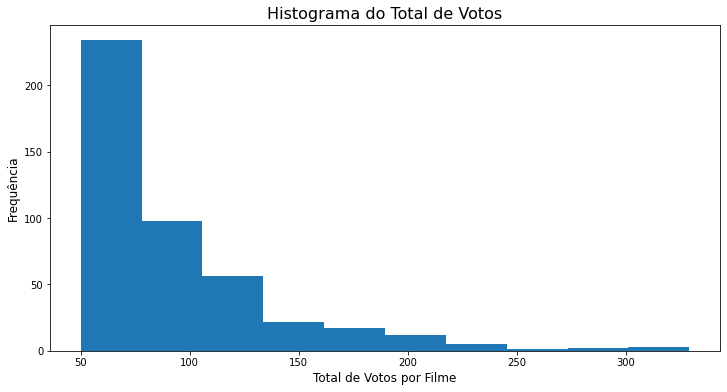

In [15]:
# solução histograma
fig, ax = plt.subplots(figsize=(12,6))

filmes.total_de_votos.plot(kind='hist')
plt.title('Histograma do Total de Votos', fontsize = 16)
plt.xlabel('Total de Votos por Filme', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12);

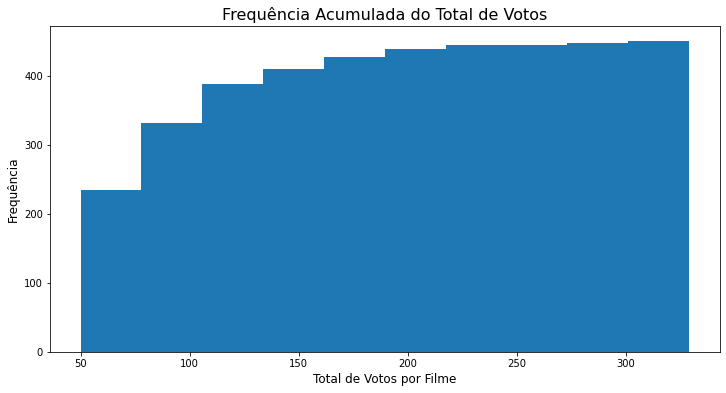

In [16]:
# solução cumulativa
fig, ax = plt.subplots(figsize=(12,6))

filmes.total_de_votos.plot(kind='hist', cumulative=True)
plt.title('Frequência Acumulada do Total de Votos', fontsize = 16)
plt.xlabel('Total de Votos por Filme', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12);

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(q=0.2)

In [18]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [19]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [20]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

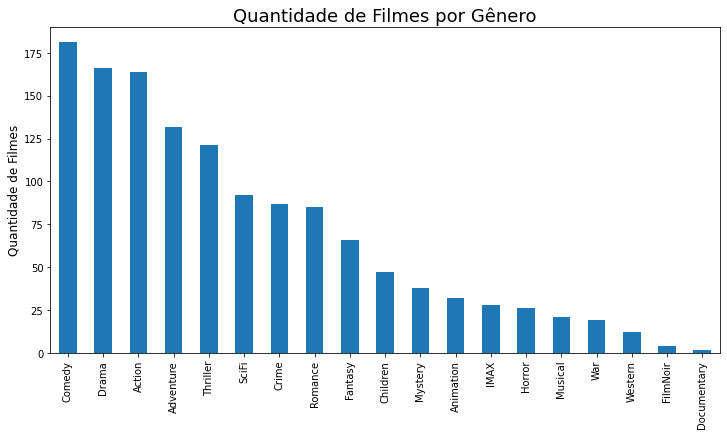

In [21]:
# solução
quantidade_de_filmes = filmes.drop(['titulo','ano_de_lancamento', 'nota_media', 'total_de_votos'], axis = 1).sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize = (12,6))

#Plotando a quantidade de filmes por gênero:
quantidade_de_filmes.plot(kind='bar')

#Formatando legendas:
plt.title('Quantidade de Filmes por Gênero', fontsize = 18)
plt.ylabel('Quantidade de Filmes', fontsize = 12);

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes = quantidade_de_filmes[:5]

In [23]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [24]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [25]:
# solucão
total_de_votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending=False)
total_de_votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

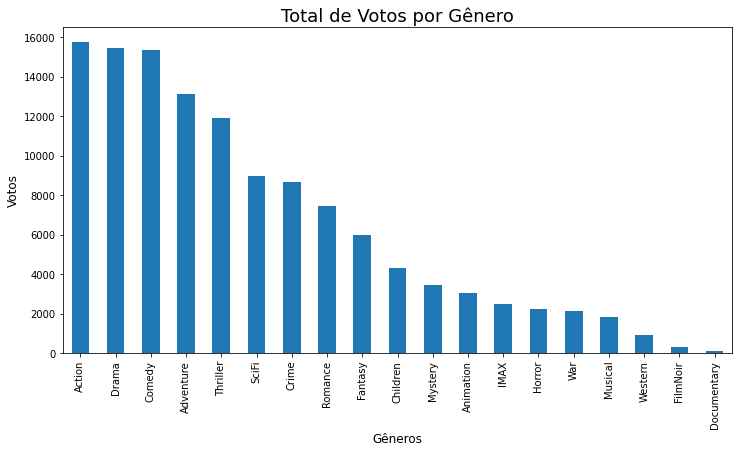

In [26]:
# solução
fig, ax = plt.subplots(figsize = (12,6))

#Plotando o total de Votos por Gênero:
total_de_votos_por_genero.plot(kind='bar')

#Formatando legendas:
plt.title('Total de Votos por Gênero', fontsize = 18)
plt.ylabel('Votos', fontsize = 12)
plt.xlabel('Gêneros', fontsize = 12);

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [27]:
# solucao código
popularidade = (total_de_votos_por_genero/quantidade_de_filmes).sort_values(ascending=False)
popularidade

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

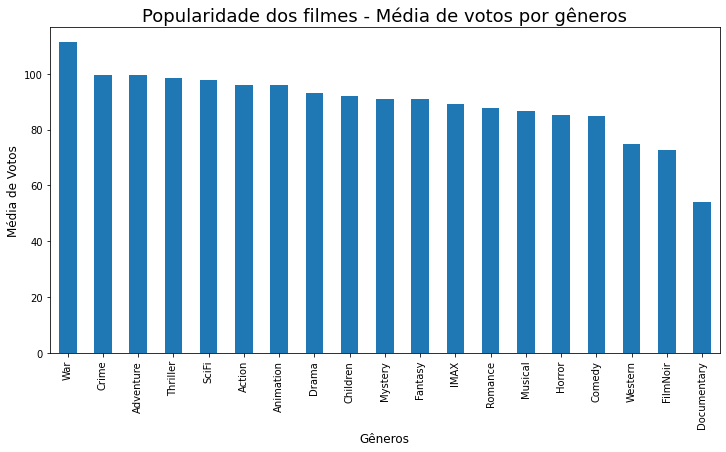

In [28]:
# solução com visualização 

#Plotando a popularidade dos gêneros:
popularidade.plot(kind='bar', figsize = (12,6))

#Formatando legendas:
plt.title('Popularidade dos filmes - Média de votos por gêneros', fontsize = 18)
plt.ylabel('Média de Votos', fontsize = 12)
plt.xlabel('Gêneros', fontsize = 12);

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
Mesmo que o gênero `Action`possue mais filmes e quantidade de votos, o gênero `War`recebe mais votos por filmes do que `Action`.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

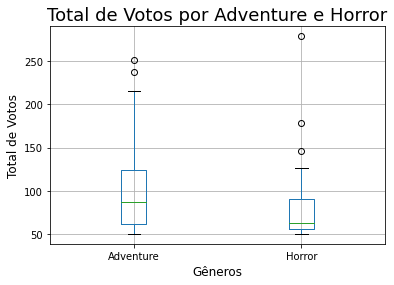

In [29]:
#solução:
df = pd.DataFrame(votos_por_genero_por_filme[(votos_por_genero_por_filme > 0)])
ax = df.boxplot(column = ['Adventure', 'Horror'])

ax.set_title("Total de Votos por Adventure e Horror", fontsize = 18)
ax.set_xlabel("Gêneros", fontsize = 12)
ax.set_ylabel("Total de Votos", fontsize = 12);

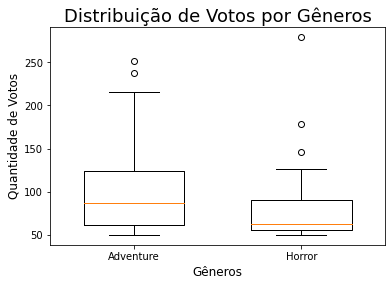

In [30]:
# solução:
Adventure_Votos = votos_por_genero_por_filme.query('Adventure>0').Adventure
Horror_Votos = votos_por_genero_por_filme.query('Horror>0').Horror

plt.figure()
ax = plt.boxplot((Adventure_Votos, Horror_Votos), labels = ['Adventure', 'Horror'], widths = 0.6)

plt.title("Distribuição de Votos por Gêneros", fontsize=18)
plt.xlabel('Gêneros', fontsize = 12)
plt.ylabel("Quantidade de Votos", fontsize = 12);

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

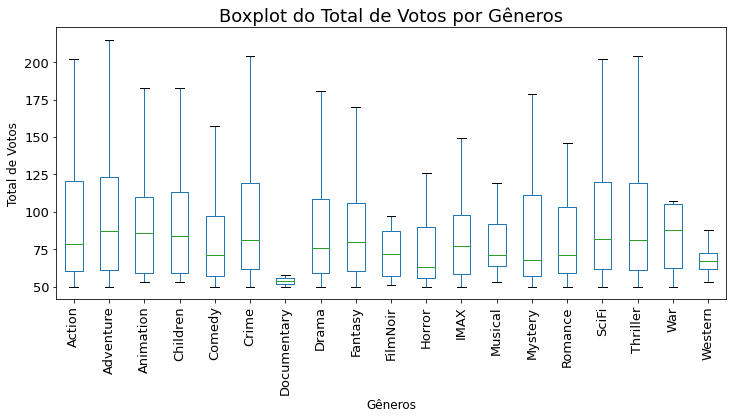

In [31]:
plt.figure(figsize = (12,5))

df = pd.DataFrame(votos_por_genero_por_filme[(votos_por_genero_por_filme > 0)])
ax = df.boxplot(grid = False, rot = 90, fontsize = 13, showfliers = False)

ax.set_title("Boxplot do Total de Votos por Gêneros", fontsize = 18)
ax.set_xlabel("Gêneros", fontsize = 12)
ax.set_ylabel("Total de Votos", fontsize = 12);

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Para obtermos um maior faturamento possível, devemos adotar um filme em que o Gênero possua uma maior média de visualização. Como não possuímos essas variável, podemos pegar uma variável que possua um maior engajamento, que seria pelo voto.

Por isso, a melhor escolha, inicialmente é o filme com gênero de **`Adventure`.**

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

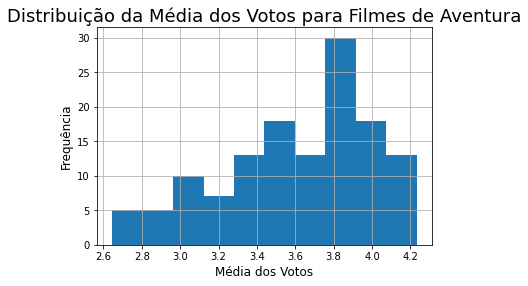

In [32]:
# solucao histograma de aventura
filmes.query('Adventure == 1').hist('nota_media')
plt.title("Distribuição da Média dos Votos para Filmes de Aventura", fontsize = 18)
plt.xlabel("Média dos Votos", fontsize = 12)
plt.ylabel("Frequência", fontsize = 12);

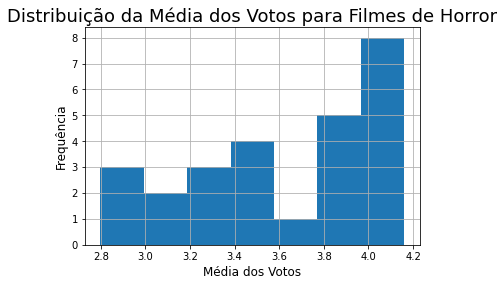

In [33]:
# solucao histograma de horror
filmes.query('Horror == 1').hist('nota_media', bins=7)
plt.title("Distribuição da Média dos Votos para Filmes de Horror", fontsize = 18)
plt.xlabel("Média dos Votos", fontsize = 12)
plt.ylabel("Frequência", fontsize = 12);

In [50]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import ranksums
_, p = ranksums(votos_por_genero_por_filme[votos_por_genero_por_filme["Horror"] > 0].Horror,
                votos_por_genero_por_filme[votos_por_genero_por_filme["Adventure"] > 0].Adventure)
p.round(3)

0.048

In [0]:
# solução com o teste desejado


# Por ser um valor p inferior à 0.05, não se aplica a utilização de testes estatísticos (ztest e ttest).
# Não se tratam de distribuição normal.

### Solução (explique sua conclusão):

Por ser um valor p inferior à 0.05, não se aplica a utilização de testes estatísticos (ztest e ttest).

Não se tratam de uma distribuição normal.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

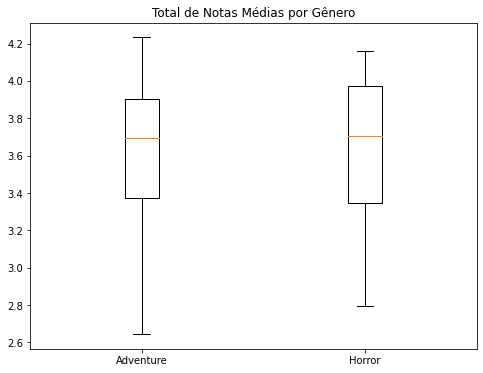

In [43]:
# solução:
plt.figure(figsize = (8,6))
plt.title("Total de Notas Médias por Gênero")

plt.boxplot([filmes.query("Adventure == 1").nota_media, filmes.query("Horror == 1").nota_media],
            labels = ['Adventure', 'Horror']);

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Eu recomendaria a escolha de um filme com o gênero `Horror`, pois, mesmo vendo que as medianas são bem semelhantes entre os gêneros de `Adventure` e `Horror`, os filmes de `Horror`tendem à alcançar melhores notas visto as notas entre o 2º Quartil e o 3º Quartil.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

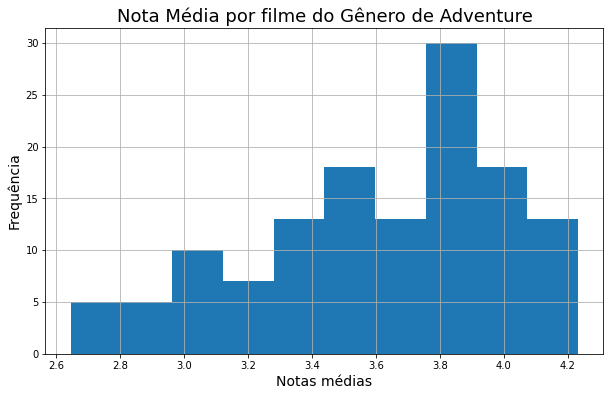

In [46]:
# solucao histograma de aventura
plt.figure(figsize = (10,6))
plt.title('Nota Média por filme do Gênero de Adventure', fontsize = 18)
plt.xlabel('Notas médias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
filmes.query("Adventure == 1").nota_media.hist();

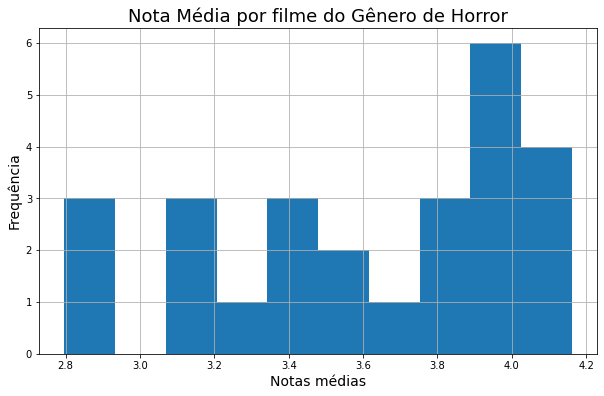

In [47]:
# solucao histograma de horror
plt.figure(figsize = (10,6))
plt.title('Nota Média por filme do Gênero de Horror', fontsize = 18)
plt.xlabel('Notas médias', fontsize = 14)
plt.ylabel('Frequência', fontsize = 14)
filmes.query("Horror == 1").nota_media.hist();

In [49]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p = ranksums(filmes.query("Adventure == 1").nota_media, filmes.query("Horror == 1").nota_media)
p.round(3)

0.831

In [52]:
# solução com o teste desejado
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import zconfint

print(ztest(filmes.query("Horror == 1").nota_media, filmes.query("Adventure == 1").nota_media))
zconfint( filmes.query("Horror == 1").nota_media, filmes.query("Adventure == 1").nota_media)

(-0.05694426988823663, 0.9545895892323115)


(-0.17166316262580447, 0.16196987742954458)

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

Com valor p bem próximo à 1 mostra que a média das notas médias dos filmes desses dois gêneros são bem semelhantes.

Visualizando o intervalo de confiança mostra que a média das notas médias dos filmes do gênero `Adventure` é ligeiramente maior quando comparada com o gênero `Horror`, portanto, a sugestão passa a ser agora realizar um filme do gênero `Adventure`.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

A recomendação para o gênero do filme é o **`Adventure`**, pois vimos que ele é mais popular e possui uma nota média melhor em relação aos filmes de `Horror`

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [0]:
votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending=False)

In [59]:
# solução: calculando os 2 generos mais votados

df = votos_por_genero.head(2).to_frame()
df.columns = ["Qnt. de Votos"]
df

,Qnt. de Votos
Action,15734.0
Drama,15445.0


In [61]:
# solução: encontrando os top 5 filmes desses generos
filmes.query("Action == 1 | Drama == 1").sort_values("nota_media", ascending = False).head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# solução: encontrando os top 10 filmes desses generos
filmes.query("Action == 1 | Drama == 1").sort_values("nota_media", ascending = False).head(10)

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
858,"Godfather, The (1972)",1972.0,4.289062,192.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1276,Cool Hand Luke (1967),1967.0,4.271930,57.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1221,"Godfather: Part II, The (1974)",1974.0,4.259690,129.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
48516,"Departed, The (2006)",2006.0,4.252336,107.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1213,Goodfellas (1990),1990.0,4.250000,126.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
912,Casablanca (1942),1942.0,4.240000,100.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [87]:
# solucao
df = filmes.corr()["nota_media"].sort_values(ascending=False).to_frame()
df.drop(["nota_media", 'total_de_votos', 'ano_de_lancamento'], axis = 0, inplace = True)
df.head(2)

,nota_media
Drama,0.277662
Crime,0.190220


In [88]:
df.tail(2)

,nota_media
Action,-0.154089
Comedy,-0.256005


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [90]:
# solucao
df = filmes.corr()["total_de_votos"].sort_values(ascending=False).to_frame()
df.drop(["nota_media", 'total_de_votos', 'ano_de_lancamento'], axis = 0, inplace = True)
df.head(2)

,total_de_votos
Adventure,0.104380
War,0.087999


In [91]:
df.tail(2)

,total_de_votos
Western,-0.060789
Comedy,-0.128527


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

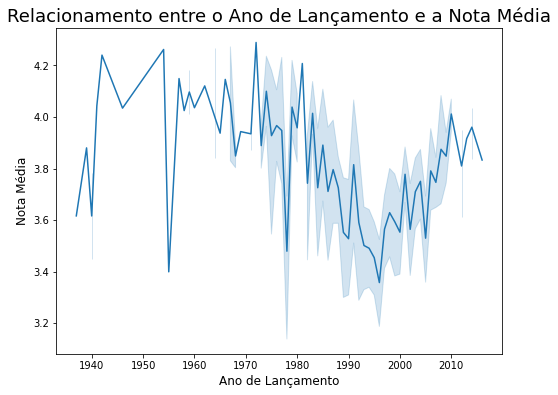

In [99]:
# solucao
plt.figure(figsize = (8,6))

ax = sns.lineplot(filmes.ano_de_lancamento, filmes.nota_media)

ax.set_title("Relacionamento entre o Ano de Lançamento e a Nota Média", fontsize = 18)
ax.set_xlabel("Ano de Lançamento", fontsize = 12)
ax.set_ylabel("Nota Média", fontsize = 12);

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [104]:
# solução (código)
filmes.corr()['nota_media'].head(1)

ano_de_lancamento   -0.159146
Name: nota_media, dtype: float64

### Solução (explicação)

Podemos perceber que a entre `ano_de_lancamento`e a `nota_media` há pouca correlação, apresentando um valor de -0.159.

Esse valor pode nos indicar uma hipotese que precisará de confirmação de que: "Na medida que o tempo passa, a media de votos diminue".

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

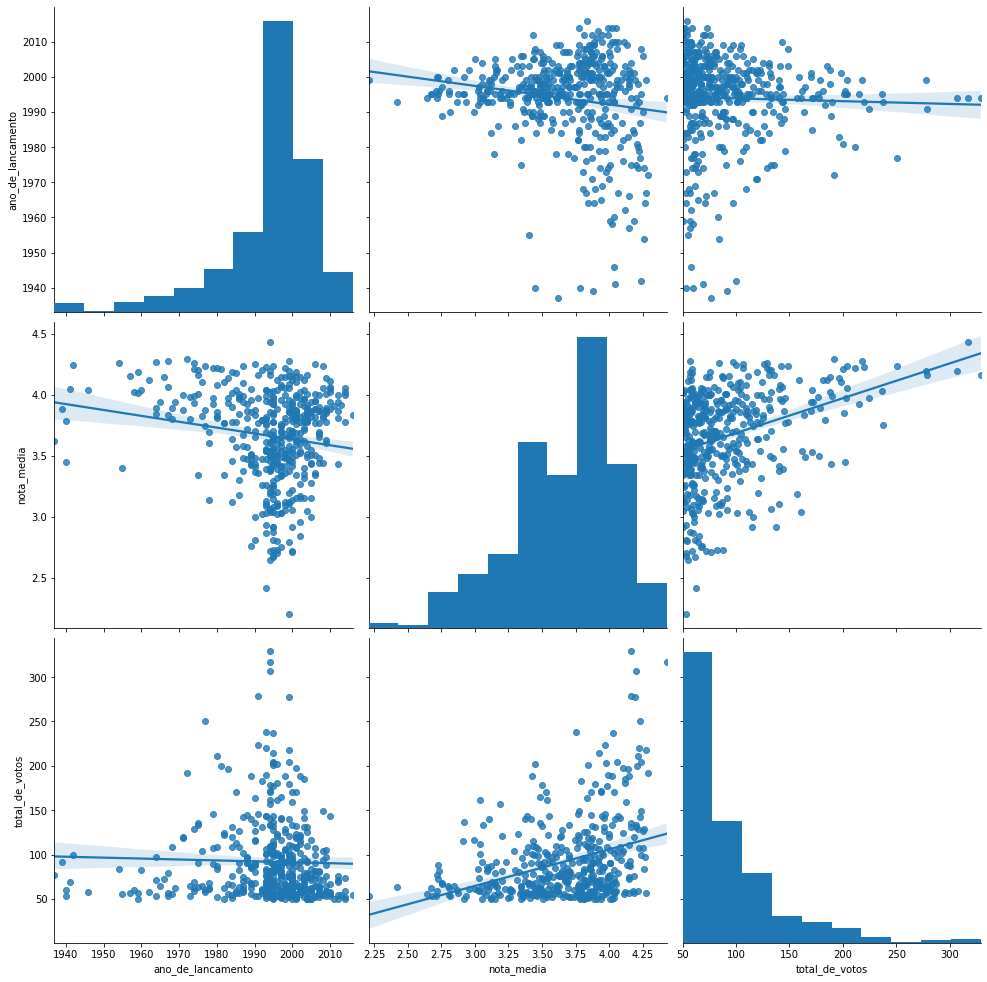

In [109]:
# solução

infos = filmes[["ano_de_lancamento", "nota_media", "total_de_votos"]]

sns.pairplot(infos, height = 4.5, kind = "reg");

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

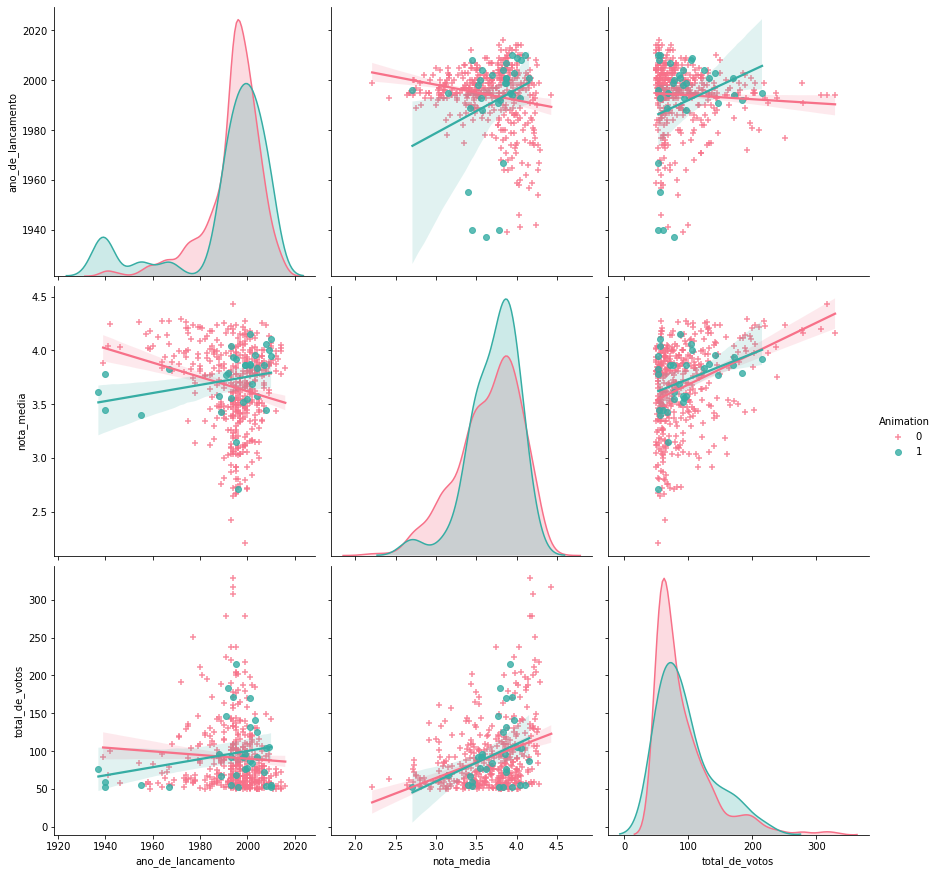

In [113]:
sns.pairplot(data = filmes,
             vars=["ano_de_lancamento", "nota_media", "total_de_votos"],
             height = 4,
             kind = "reg",
             hue = "Animation",
             palette = "husl",
             markers=["+", "o"]);

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

A `nota_media` dos filmes de `Animation`tendem a aumentar em relação ao `ano_de_lancamento`.

Podemos perceber que ao decorrer dos anos (`anos_de_lancamento`), a quantidade total de votos (`total_de_votos`) tendem a diminuir.

Podemos criar uma hipotese que os filmes de Animação causam uma certa nostalgia nas pessoas, fazendo com que elas se engajem. Mas que no geral, pela grande quantidade de filmes lançados, poucos são vistos ou recebem o luxo de terem grandes quantidades de votos.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

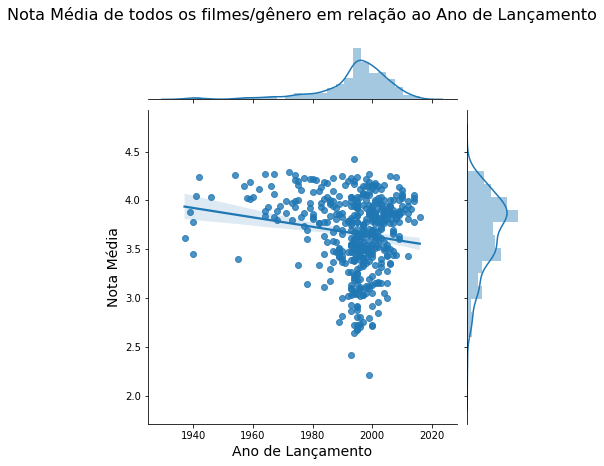

<Figure size 864x576 with 0 Axes>

In [118]:
# solução
ax = sns.jointplot(filmes.ano_de_lancamento, filmes.nota_media, kind = 'reg')


ax.ax_joint.set_title("Nota Média de todos os filmes/gênero em relação ao Ano de Lançamento", fontsize = 16, pad = 90)
ax.ax_joint.set_xlabel("Ano de Lançamento", fontsize = 14)
ax.ax_joint.set_ylabel("Nota Média", fontsize = 14);

Nesse Gráfico plotado a cima, podemos ver a linha de tendência da Nota Média dos votos computados ao decorrer dos anos.